In [13]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [14]:
def convolve_im(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    # FFT
    fft = np.fft.fft2(im)
    # Filtered FFT image
    filtered_fft = np.multiply(fft, fft_kernel)
    # Filtered spatial image (inverse FFT)
    conv_result = np.fft.ifft2(filtered_fft).real

    fft_to_im = lambda fft: np.log(np.abs(np.fft.fftshift(fft)) + 1)

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        # Visualize FFT
        plt.subplot(1, 5, 2)
        plt.imshow(fft_to_im(fft), cmap="gray")
        # Visualize FFT kernel
        plt.subplot(1, 5, 3)
        plt.imshow(fft_to_im(fft_kernel), cmap="gray")
        # Visualize filtered FFT image
        plt.subplot(1, 5, 4)
        plt.imshow(fft_to_im(filtered_fft), cmap="gray")
        # Visualize filtered spatial image
        plt.subplot(1, 5, 5) 
        plt.imshow(conv_result, cmap="gray")

    return conv_result

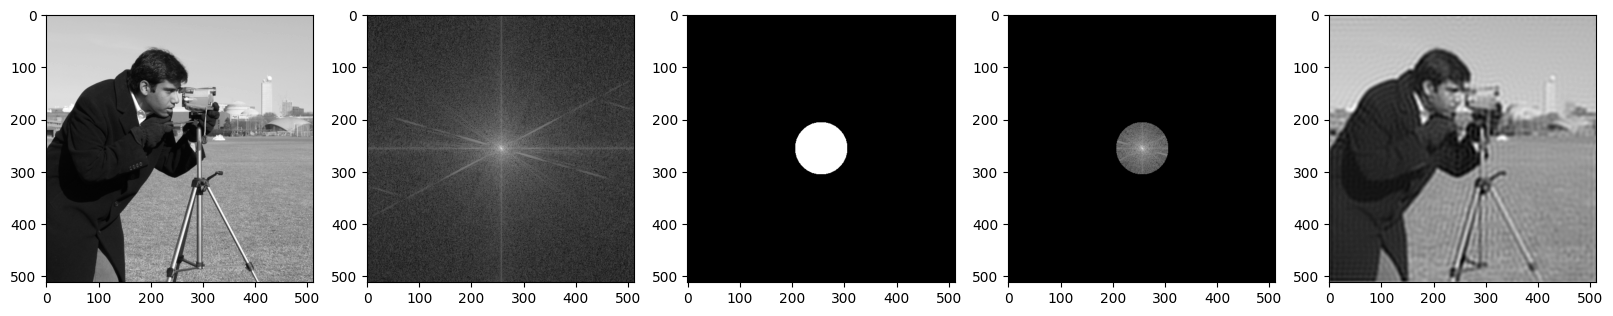

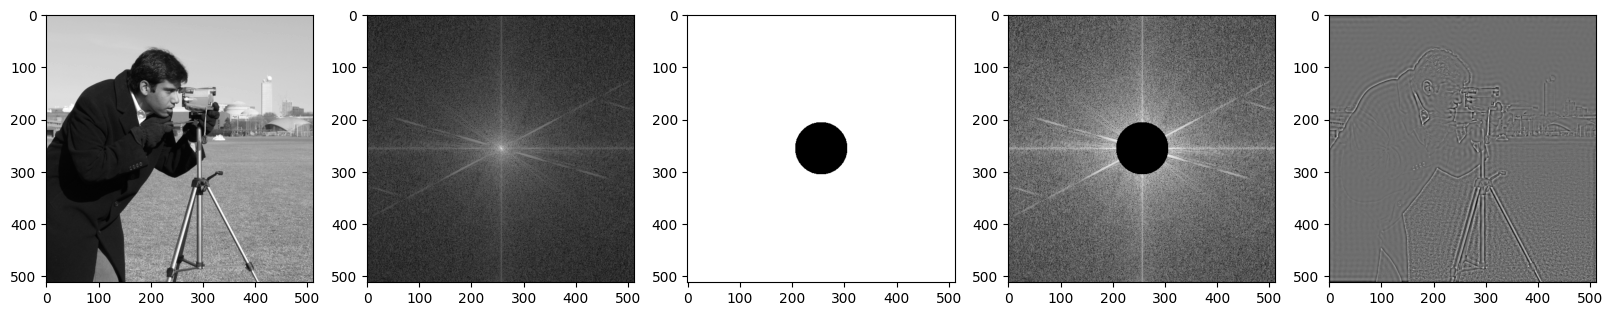

Saving image to: image_processed/camera_low_pass.png
Saving image to: image_processed/camera_high_pass.png


In [15]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)